As a final piece to processing our inflammation data, we need a way to get a list of all the files in out `data` directory. The following library will help us to achieve this:

In [1]:
import glob

The `glob` library contains a function that finds files and directories whose names match a pattern. We provide those patterns as strings: the character * matches zero or more characters, while ? matches any one character. We can use this to get the names of all the CSV files in the current directory:

In [3]:
print(glob.glob('data/inflammation*.csv'))

['data\\inflammation-01.csv', 'data\\inflammation-02.csv', 'data\\inflammation-03.csv', 'data\\inflammation-04.csv', 'data\\inflammation-05.csv', 'data\\inflammation-06.csv', 'data\\inflammation-07.csv', 'data\\inflammation-08.csv', 'data\\inflammation-09.csv', 'data\\inflammation-10.csv', 'data\\inflammation-11.csv', 'data\\inflammation-12.csv']


As these examples show, `glob.glob`'s result is a list of file and directory paths. 

We can generate a set of plots for each file in our inflammation dataset.

data\inflammation-01.csv


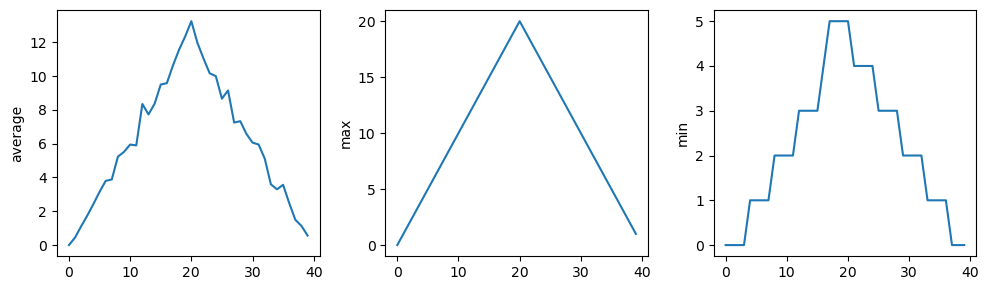

data\inflammation-02.csv


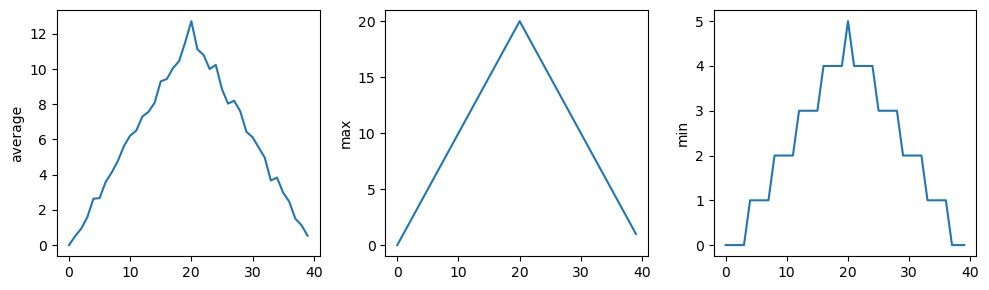

data\inflammation-03.csv


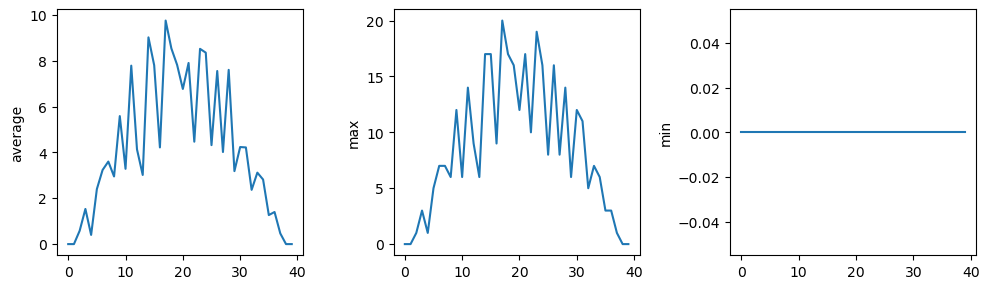

In [6]:
import numpy as np
import matplotlib.pyplot as plt

filenames = (glob.glob('data/inflammation*.csv'))
filenames = filenames[0:3]

for filaname in filenames:
    print(filaname)
    
    data = np.loadtxt(fname=filaname, delimiter = ',')
    
    fig = plt.figure(figsize=(10.0, 3.0))
    
    axes1 = fig.add_subplot(1, 3, 1)
    axes2 = fig.add_subplot(1, 3, 2)
    axes3 = fig.add_subplot(1, 3, 3)
    
    axes1.set_ylabel('average')
    axes1.plot(np.mean(data, axis=0))
    
    axes2.set_ylabel('max')
    axes2.plot(np.amax(data, axis=0))
    
    axes3.set_ylabel('min')
    axes3.plot(np.amin(data, axis=0))
    
    fig.tight_layout()
    plt.show()



The plots generated for the second clinical trial file look very similar to the plots for the first file.

The third dataset show much noiser average and maxima plots that are far less suspicious than the first two dataset, however the minima plot shows that the third dataset minima is consistently zero across every day of the trial. If we produce a heat map for the third data file we see the following:

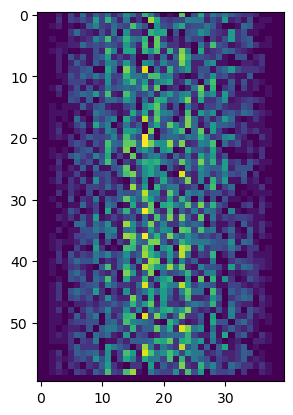

In [9]:
data3 = np.loadtxt(fname=filenames[2], delimiter=',')

image = plt.imshow(data3)

plt.show()

We can see that there are zero values sporadically distributed across all patients and days of the clinical trial, suggesting that were potential issues with data collection throughout the trial. In addition, we can see that the last patient in the study didn't have any inflammation flare-ups at all throughout the trial, suggesting that they may not even suffer from arthritis!

## Ex 1: Plotting differences

Plot the difference between the average inflammations reported in the first and second datasets (stored in `inflammation-01.csv` and `inflammation-02.csv`, correspondingly), i.e., the difference between the lefmost plots of the first two figures

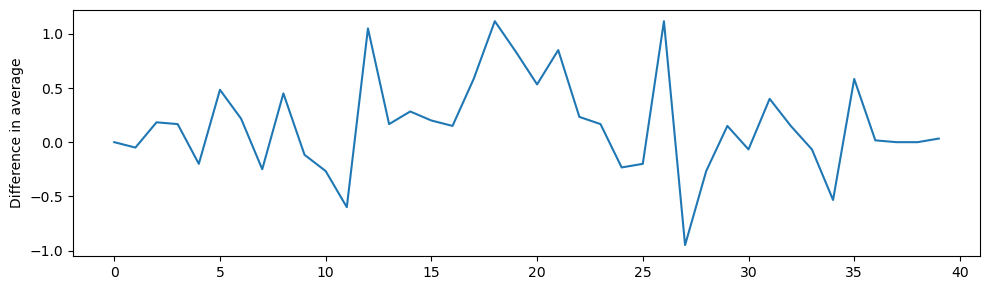

In [16]:
data0 = np.loadtxt(fname=filenames[0], delimiter=',')
data1 = np.loadtxt(fname=filenames[1], delimiter=',')

fig  = plt.figure(figsize=(10,3))

plt.ylabel('Difference in average')
plt.plot(np.mean(data0, axis=0) - np.mean(data1, axis=0))

fig.tight_layout()
plt.show()



## Ex 2: Generate composite statistics

Use each of the files once to generate a dataset containing values averaged over all patients by completing the code inside the loop given below:

```python
composite_data = np.zeros((60,40))

for filename in filenames:
    #sum each new file's data into composite_data as it's read
    #
```
 and then divide the coposite_data by number of samples

```python
composite_data = composite_data / len(filenames) 
```

Then use pyplot to generate average, max, and min for all patients

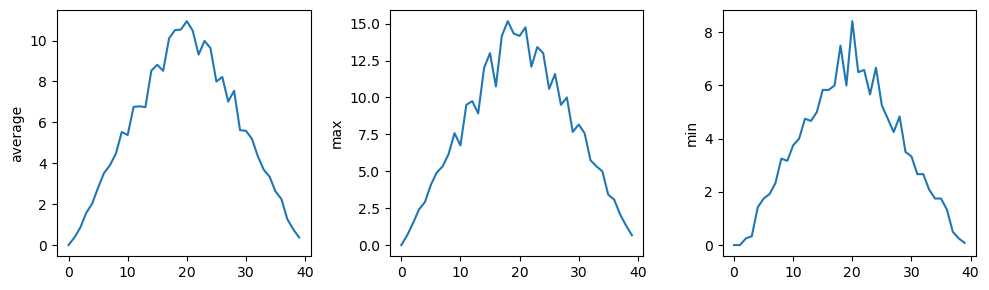

In [26]:
#ANSWER


filenames = glob.glob('data/inflammation*.csv')
composite_data = np.zeros((60,40))

for filename in filenames:
    data = np.loadtxt(fname=filename, delimiter=',')
    
    composite_data = composite_data + data
    
composite_data = composite_data/len(filenames)

fig = plt.figure(figsize=(10,3))

axes1 = fig.add_subplot(1, 3, 1)
axes2 = fig.add_subplot(1, 3, 2)
axes3 = fig.add_subplot(1, 3, 3)

axes1.set_ylabel('average')
axes1.plot(np.mean(composite_data, axis=0))

axes2.set_ylabel('max')
axes2.plot(np.amax(composite_data, axis=0))

axes3.set_ylabel('min')
axes3.plot(np.amin(composite_data, axis=0))

fig.tight_layout()
plt.show()


 

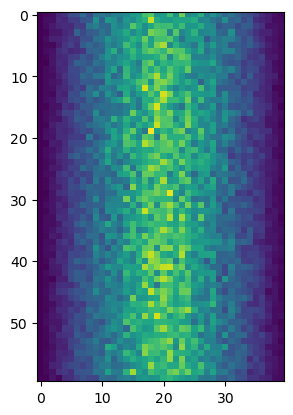

In [27]:
heat_map = plt.imshow(composite_data)

plt.show()